In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score


In [314]:
df = pd.read_csv("/Users/premsai/Desktop/ML_PROJECTS/BANK_PROJECT/data/raw/german_credit_supervised.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,996,40,male,3,own,little,little,3857,30,car,1
997,997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,998,23,male,2,free,little,little,1845,45,radio/TV,1


In [315]:
df.drop(columns=["Unnamed: 0"],inplace=True)
df


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1


In [316]:
print(df.isna().sum())
print(df.shape)
print(df.describe())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Credit_Risk           0
dtype: int64
(1000, 10)
               Age          Job  Credit amount     Duration  Credit_Risk
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000     0.641000
std      11.375469     0.653614    2822.736876    12.058814     0.479947
min      19.000000     0.000000     250.000000     4.000000     0.000000
25%      27.000000     2.000000    1365.500000    12.000000     0.000000
50%      33.000000     2.000000    2319.500000    18.000000     1.000000
75%      42.000000     2.000000    3972.250000    24.000000     1.000000
max      75.000000     3.000000   18424.000000    72.000000     1.000000


In [317]:
numerical_cols=df.select_dtypes(include='number')
categorical_cols = df.select_dtypes(include='object')

print(numerical_cols.columns)

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Credit_Risk'], dtype='object')


In [318]:
# here numerical columns doesn't have the missing values so lets preprocess them first and then lets handle the categorical columns after splitting 

# lets check for outlier and handle them using boxcox/log

q1 = df[numerical_cols.columns].quantile(0.25)
q3 = df[numerical_cols.columns].quantile(0.75)

IQR = q3-q1

lowerbound = q1-1.5*IQR
upperbound = q3+1.5*IQR

outliers = (df[numerical_cols.columns]<lowerbound) | (df[numerical_cols.columns]>upperbound)


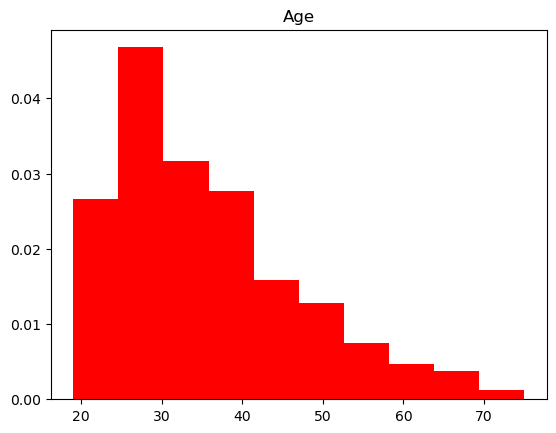

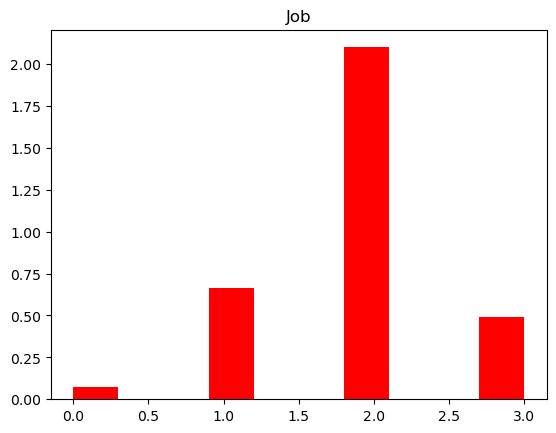

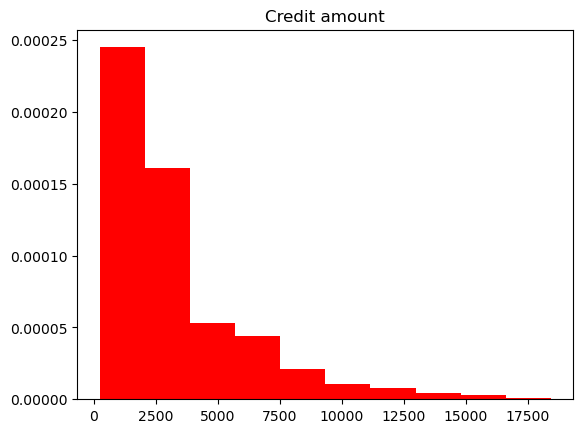

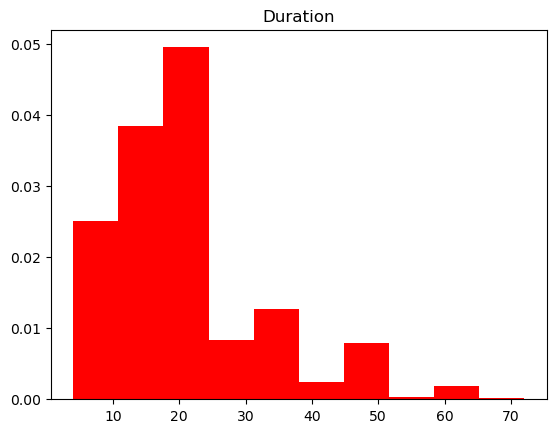

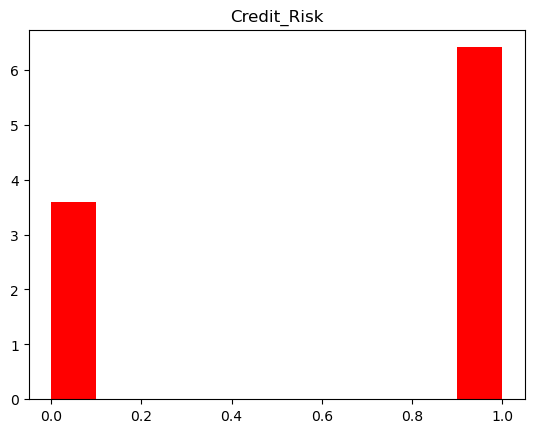

In [319]:
for col in numerical_cols.columns:
    pyplot.hist(df[col],density=True,color='red')
    pyplot.title(col)
    pyplot.show()

In [320]:
print(outliers)

       Age    Job  Credit amount  Duration  Credit_Risk
0     True  False          False     False        False
1    False  False          False      True        False
2    False   True          False     False        False
3    False  False          False     False        False
4    False  False          False     False        False
..     ...    ...            ...       ...          ...
995  False   True          False     False        False
996  False   True          False     False        False
997  False  False          False     False        False
998  False  False          False      True        False
999  False  False          False      True        False

[1000 rows x 5 columns]


In [321]:
for col in categorical_cols.columns:
    print(df[col].value_counts())

Sex
male      690
female    310
Name: count, dtype: int64
Housing
own     713
rent    179
free    108
Name: count, dtype: int64
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


In [322]:


df["Sex"] = df["Sex"].map({"male":0,"female":1})


In [323]:
X=df.drop(columns=["Credit_Risk"])
Y=df["Credit_Risk"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=42,shuffle=True,stratify=Y)

In [324]:
x_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
808,55,0,3,free,little,moderate,9283,42,car
483,30,1,2,own,rich,NaN,960,15,furniture/equipment
187,68,0,0,free,little,moderate,1175,16,car
56,52,0,3,own,NaN,moderate,6468,12,radio/TV
186,74,1,3,free,little,moderate,5129,9,car
...,...,...,...,...,...,...,...,...,...
226,27,0,2,own,rich,moderate,10961,48,radio/TV
283,63,0,2,own,NaN,NaN,1520,15,furniture/equipment
343,33,0,3,own,little,moderate,4439,18,business
462,34,1,3,rent,little,moderate,3017,12,furniture/equipment


In [325]:
x_train.fillna(x_train.mode(),inplace=True)
x_test.fillna(x_test.mode(),inplace=True)

In [326]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [327]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [328]:
model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=10,          
    min_samples_split=10,  
    min_samples_leaf=5,    
    random_state=33
)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [329]:
y_pred = model.predict(x_test)

In [330]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print(accuracy)
print(precision)

0.955
0.9375


In [331]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Check class distribution
print("="*50)
print("CLASS DISTRIBUTION")
print("="*50)
print("\nTraining set:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

print("\nTest set:")
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

# 2. Confusion Matrix
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

# 3. Full Classification Report
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred))



CLASS DISTRIBUTION

Training set:
Credit_Risk
1    385
0    215
Name: count, dtype: int64
Credit_Risk
1    0.641667
0    0.358333
Name: proportion, dtype: float64

Test set:
Credit_Risk
1    256
0    144
Name: count, dtype: int64
Credit_Risk
1    0.64
0    0.36
Name: proportion, dtype: float64

CONFUSION MATRIX
[[127  17]
 [  1 255]]

True Negatives:  127
False Positives: 17
False Negatives: 1
True Positives:  255

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       144
           1       0.94      1.00      0.97       256

    accuracy                           0.95       400
   macro avg       0.96      0.94      0.95       400
weighted avg       0.96      0.95      0.95       400



In [332]:
train_acc = model.score(x_train, y_train)
test_acc = 0.98

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print(f"Difference:     {train_acc - test_acc:.4f}")

if train_acc > 0.995:
    print("⚠️ Possible overfitting - train accuracy is very high")
elif train_acc - test_acc < 0.05:
    print("Good generalization - model is not overfitting")

Train Accuracy: 0.9917
Test Accuracy:  0.9800
Difference:     0.0117
✅ Good generalization - model is not overfitting
